**Oversampling e Undersampling: Equilibrando Seu Conjunto de Dados**

Imagine que você está tentando identificar transações fraudulentas (a classe minoritária, pois fraude é rara) em um banco de dados de transações normais (a classe majoritária, a maioria das transações). Se o seu modelo for treinado em dados desbalanceados, ele pode se tornar muito bom em prever "não-fraude" (já que é o que ele vê a maior parte do tempo) e muito ruim em prever "fraude", que é exatamente o que você mais quer detectar!

Por que as classes desbalanceadas são um problema?

* Viés do Modelo: O modelo é "preguiçoso" e tende a prever sempre a classe majoritária para obter uma alta acurácia aparente, mas falha nas classes minoritárias importantes.
* Acurácia Enganosa: Uma acurácia de 99% pode parecer ótima, mas se a fraude é 1% dos dados e o modelo sempre prevê "não-fraude", ele terá 99% de acurácia, mas detectará 0% das fraudes!



Oversampling e Undersampling são estratégias para "rebalancear" o dataset, dando ao modelo uma chance melhor de aprender sobre a classe minoritária.

1. Oversampling (Superamostragem): Aumenta o número de exemplos da classe minoritária. Pense em "clonar" ou criar novos exemplos semelhantes aos existentes da classe minoritária.

* Vantagens: Não perde informações da classe majoritária.
* Desvantagens: Pode levar a overfitting se criar muitos exemplos idênticos ou muito parecidos, e aumenta o tamanho do dataset. O SMOTE (Synthetic Minority Oversampling Technique) é uma técnica popular que cria exemplos sintéticos, não apenas clones.

2. Undersampling (Subamostragem): Reduz o número de exemplos da classe majoritária. Pense em "descartar" aleatoriamente alguns exemplos da classe majoritária.

* Vantagens: Pode ajudar a reduzir o tempo de treinamento (dataset menor) e mitigar overfitting na classe majoritária.
* Desvantagens: Pode levar à perda de informações importantes da classe majoritária, já que você está descartando dados reais.

In [2]:
!pip install imbalanced-learn

Iniciando a demonstração didática de Oversampling e Undersampling...

PASSO 1: Geramos um conjunto de dados desbalanceado.
  Contagem de Classes Original: Counter({np.int64(0): 900, np.int64(1): 100})
  (Temos 90% da Classe 0 e 10% da Classe 1 - um problema clássico de desbalanceamento!)

---------------------------------------------------

Contagem de Classes no Treino (original): Counter({np.int64(0): 630, np.int64(1): 70})
Contagem de Classes no Teste (original): Counter({np.int64(0): 270, np.int64(1): 30})

PASSO 2: Treinamos um modelo SEM balanceamento de classes.
  Relatório de Classificação (SEM Balanceamento):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       270
           1       1.00      0.90      0.95        30

    accuracy                           0.99       300
   macro avg       0.99      0.95      0.97       300
weighted avg       0.99      0.99      0.99       300

  Matriz de Confusão (SEM Balanceamento):
[[270

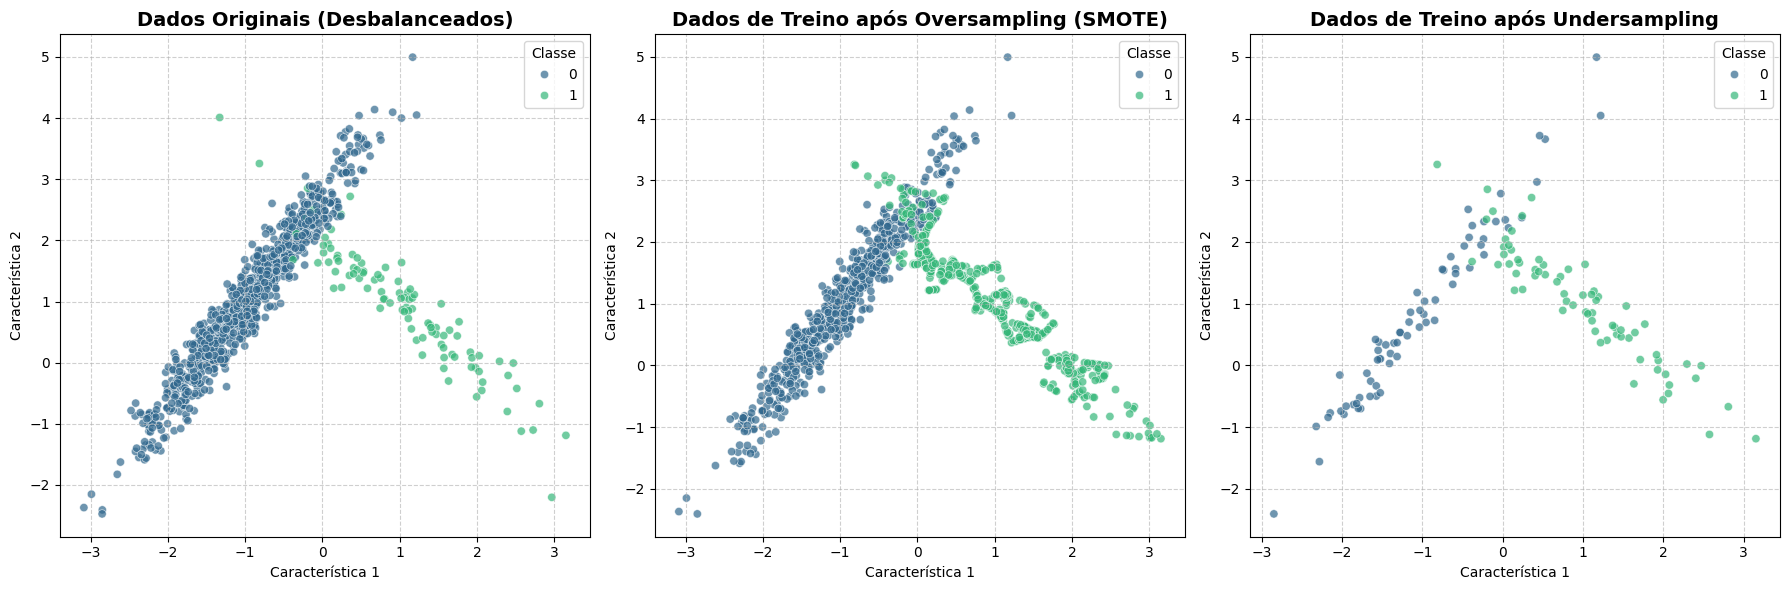


--- RESUMO FINAL ---
Observe nos resultados do console (Relatório de Classificação) e nos gráficos:
- O modelo SEM balanceamento geralmente tem um 'recall' baixo para a Classe 1 (minoritária).
- Com **OVERSAMPLING (SMOTE)**, a Classe 1 é 'inflada' com exemplos sintéticos, melhorando a capacidade do modelo de detectá-la.
- Com **UNDERSAMPLING**, a Classe 0 é reduzida. Isso pode ajudar, mas há o risco de perder informações importantes da Classe 0.

A escolha entre Oversampling, Undersampling ou uma combinação depende do seu problema, do tamanho do seu dataset e da importância de cada classe. O objetivo é sempre garantir que o modelo aprenda de forma justa sobre todas as classes!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter # Para contar as classes
from sklearn.datasets import make_classification # Para gerar dados desbalanceados
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Importar as técnicas de balanceamento
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline # Para combinar etapas

print("Iniciando a demonstração didática de Oversampling e Undersampling...\n")

# --- PASSO 1: Gerar um Conjunto de Dados Desbalanceado ---
# Vamos criar um dataset onde a Classe 0 (Majoritária) tem muito mais exemplos que a Classe 1 (Minoritária).
# 'weights' define a proporção das classes (0.9 para Classe 0, 0.1 para Classe 1)
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, weights=[0.90, 0.10],
                           flip_y=0, random_state=42)

print("PASSO 1: Geramos um conjunto de dados desbalanceado.")
print(f"  Contagem de Classes Original: {Counter(y)}")
print("  (Temos 90% da Classe 0 e 10% da Classe 1 - um problema clássico de desbalanceamento!)\n")
print("---------------------------------------------------\n")

# Dividir os dados em treino e teste (importante para não vazar informações)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Contagem de Classes no Treino (original): {Counter(y_train)}")
print(f"Contagem de Classes no Teste (original): {Counter(y_test)}\n")


# --- PASSO 2: Treinar um Modelo SEM Balanceamento ---
# Veremos como o modelo se comporta quando não fazemos nada para balancear.

print("PASSO 2: Treinamos um modelo SEM balanceamento de classes.")
model_no_balance = LogisticRegression(random_state=42, solver='liblinear')
model_no_balance.fit(X_train, y_train)
y_pred_no_balance = model_no_balance.predict(X_test)

print("  Relatório de Classificação (SEM Balanceamento):")
print(classification_report(y_test, y_pred_no_balance))
print("  Matriz de Confusão (SEM Balanceamento):")
print(confusion_matrix(y_test, y_pred_no_balance))
print("  (Observe que a 'recall' da Classe 1 é provavelmente baixa, indicando que o modelo erra muito nela.)")
print("---------------------------------------------------\n")


# --- PASSO 3: Aplicar OVERSAMPLING (SMOTE) ---
# Aumentando o número de exemplos da classe minoritária.
# SMOTE cria exemplos SINTÉTICOS, não apenas cópias.

print("PASSO 3: Aplicamos OVERSAMPLING (SMOTE) para aumentar a Classe 1.")
print("  -> O SMOTE vai criar 'novos' exemplos para a Classe 1, parecidos com os que já existem.")

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"  Contagem de Classes no Treino (após SMOTE): {Counter(y_train_smote)}")
print("  (Agora, ambas as classes têm o mesmo número de exemplos no conjunto de treino!)\n")

# Treinar modelo com dados balanceados por SMOTE
model_smote = LogisticRegression(random_state=42, solver='liblinear')
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)

print("  Relatório de Classificação (COM OVERSAMPLING - SMOTE):")
print(classification_report(y_test, y_pred_smote))
print("  Matriz de Confusão (COM OVERSAMPLING - SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))
print("  (Compare o 'recall' da Classe 1 com o modelo sem balanceamento. Ele deve ter melhorado!)")
print("---------------------------------------------------\n")


# --- PASSO 4: Aplicar UNDERSAMPLING (RandomUnderSampler) ---
# Reduzindo o número de exemplos da classe majoritária.

print("PASSO 4: Aplicamos UNDERSAMPLING (RandomUnderSampler) para reduzir a Classe 0.")
print("  -> O Undersampling vai remover aleatoriamente alguns exemplos da Classe 0.")

undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print(f"  Contagem de Classes no Treino (após Undersampling): {Counter(y_train_under)}")
print("  (Agora, a Classe 0 foi reduzida para ter o mesmo número de exemplos da Classe 1.)\n")

# Treinar modelo com dados balanceados por Undersampling
model_under = LogisticRegression(random_state=42, solver='liblinear')
model_under.fit(X_train_under, y_train_under)
y_pred_under = model_under.predict(X_test)

print("  Relatório de Classificação (COM UNDERSAMPLING):")
print(classification_report(y_test, y_pred_under))
print("  Matriz de Confusão (COM UNDERSAMPLING):")
print(confusion_matrix(y_test, y_pred_under))
print("  (Compare o 'recall' da Classe 1 novamente. Ele também deve ter melhorado, mas talvez menos que SMOTE.)")
print("---------------------------------------------------\n")


# --- PASSO 5: Visualização dos Dados Balanceados ---

print("PASSO 5: Visualizamos os dados ANTES e DEPOIS do balanceamento.")

plt.figure(figsize=(18, 6))

# Gráfico de Dados Originais
plt.subplot(1, 3, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.title('Dados Originais (Desbalanceados)', fontsize=14, weight='bold')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Classe')

# Gráfico de Dados após Oversampling (SMOTE) no Treino
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_train_smote[:, 0], y=X_train_smote[:, 1], hue=y_train_smote, palette='viridis', alpha=0.7)
plt.title('Dados de Treino após Oversampling (SMOTE)', fontsize=14, weight='bold')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Classe')

# Gráfico de Dados após Undersampling no Treino
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_train_under[:, 0], y=X_train_under[:, 1], hue=y_train_under, palette='viridis', alpha=0.7)
plt.title('Dados de Treino após Undersampling', fontsize=14, weight='bold')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Classe')

plt.tight_layout()
plt.show()


print("\n--- RESUMO FINAL ---")
print("Observe nos resultados do console (Relatório de Classificação) e nos gráficos:")
print("- O modelo SEM balanceamento geralmente tem um 'recall' baixo para a Classe 1 (minoritária).")
print("- Com **OVERSAMPLING (SMOTE)**, a Classe 1 é 'inflada' com exemplos sintéticos, melhorando a capacidade do modelo de detectá-la.")
print("- Com **UNDERSAMPLING**, a Classe 0 é reduzida. Isso pode ajudar, mas há o risco de perder informações importantes da Classe 0.")
print("\nA escolha entre Oversampling, Undersampling ou uma combinação depende do seu problema, do tamanho do seu dataset e da importância de cada classe. O objetivo é sempre garantir que o modelo aprenda de forma justa sobre todas as classes!")